<a href="https://colab.research.google.com/github/jeffheaton/app_generative_ai/blob/main/t81_559_class_09_2_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-559: Applications of Generative Artificial Intelligence
**Module 9: MultiModal and Text to Image Models**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 9 Material

Module 9: MultiModal and Text to Image

* Part 9.1: Introduction to MultiModal and Text to Image [[Video]](https://www.youtube.com/watch?v=lcUsade04pg&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_1_image_genai.ipynb)
* **Part 9.2: Generating Images with DALL·E Kaggle Notebooks** [[Video]](https://www.youtube.com/watch?v=CBfT1y1V1e0&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_2_dalle.ipynb)
* Part 9.3: DALL·E Existing Images [[Video]](https://youtube.com/watch?v=5gdaXrJs3Kk&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_3_dalle_existing.ipynb)
* Part 9.4: MultiModal Models [[Video]](https://www.youtube.com/watch?v=rYlj9t_wlFA&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_4_multimodal.ipynb)
* Part 9.5: Illustrated Book [[Video]](https://www.youtube.com/watch?v=TTGen7P3ScU&ab_channel=JeffHeaton) [[Notebook]](t81_559_class_09_5_illustrated_book.ipynb)

# Google CoLab Instructions
The following code ensures that Google CoLab is running and maps Google Drive if needed.

In [1]:
import os

try:
    from google.colab import drive, userdata
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# OpenAI Secrets
if COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# Install needed libraries in CoLab
if COLAB:
    !pip install langchain openai

Note: not using Google CoLab


# Part 9.2: Generating Images with DALL·E

DALL·E is an advanced generative AI model developed by OpenAI that creates images from textual descriptions. It is designed to interpret and visually represent detailed prompts, producing diverse and creative imagery ranging from realistic to abstract. DALL·E is capable of synthesizing a wide variety of artistic styles, objects, and environments based on the user’s input.

API access to DALL·E is available through OpenAI, allowing developers to integrate image generation capabilities into their applications. This API allows users to provide text prompts, specifying what kind of image they want, and DALL·E responds by generating corresponding visuals. The API is designed for scalability and ease of integration, making it a powerful tool for developers seeking to add creative image generation features to web applications, mobile apps, or other digital platforms.

By leveraging DALL·E through the OpenAI API, users gain access to a state-of-the-art tool capable of turning imagination into highly detailed visuals, applicable in industries ranging from design and marketing to entertainment and education.

## DALE2 vs DALE3

DALL·E 2 and DALL·E 3 are successive versions of OpenAI’s powerful image generation models, each building upon the strengths and capabilities of its predecessor.

DALL·E 2, released in 2022, represented a significant leap from the original DALL·E model. It was capable of creating high-resolution, highly detailed images from textual prompts, with a particular focus on creative abstraction and imaginative combinations. Some key features of DALL·E 2 include:

* **Realism and Artistic Expression**: DALL·E 2 excelled at generating both photorealistic images and artistic interpretations based on the text input. It had a remarkable ability to blend various elements (e.g., surreal, abstract, or realistic objects) into coherent compositions.
* **Inpainting**: Users could modify specific parts of an image by describing the desired change, allowing for more interactive control over image generation.
* **Style Variations**: DALL·E 2 could mimic different art styles, such as painting or photography, providing flexibility for creative projects.

While DALL·E 2 was highly versatile and generated impressive imagery, its prompt comprehension and adherence to nuanced text could sometimes fall short. It struggled with complex or ambiguous instructions, occasionally misinterpreting subtle details in the user input.

DALL·E 3, released in 2023, improved upon the limitations of DALL·E 2 and introduced new capabilities that made it more accessible and precise:

* **Enhanced Text Comprehension**: One of the standout features of DALL·E 3 is its improved ability to understand and accurately follow more complex or specific instructions. It does a much better job of capturing nuances, making it easier to generate images that align with the user’s expectations, even with detailed or intricate prompts.
* **Deeper Integration with ChatGPT**: DALL·E 3 was deeply integrated with ChatGPT, enabling users to interact with the model conversationally, refining their prompts and requests iteratively. This integration simplifies the creative process, allowing for more intuitive prompt adjustments.
* **Reduction of Known Limitations**: DALL·E 3 improved its handling of difficult tasks such as rendering human hands and faces, areas where previous models often produced distorted or unrealistic results.
Inpainting Enhancements: DALL·E 3 continues the development of inpainting, providing even greater control over modifications to specific areas of generated images, allowing users to refine portions of images without starting over from scratch.

The Images API provides three methods for interacting with images:

* Creating images from scratch based on a text prompt (DALL·E 3 and DALL·E 2)
* Creating edited versions of images by having the model replace some areas of a pre-existing image, based on a new text prompt (DALL·E 2 only)
* Creating variations of an existing image (DALL·E 2 only)


## Generating Multiple Images

DALL·E 2 allows you to generate multiple images, which we will see in this section.

You are allowed to select the resolution, by the OpenAI library; however, not all of these resolutions will be available for every model:

* 1024x512
* 256x256
* 512x512
* 1024x1024
* 1024x1792
* 1792x1024

DALL·E 3 allows an additional quality of "hd"; whereas DALL·E 2 only supports "df".

* standard
* hd

The following code generates a "a white siamese cat".




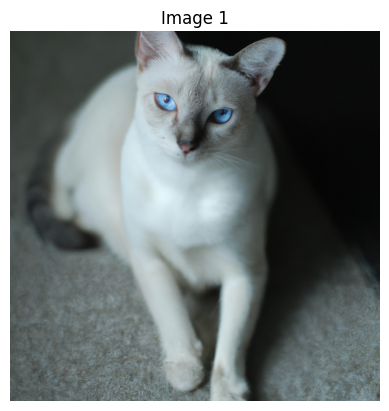

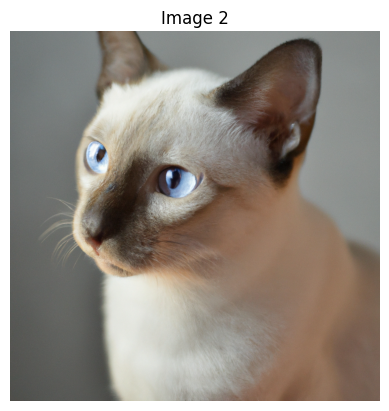

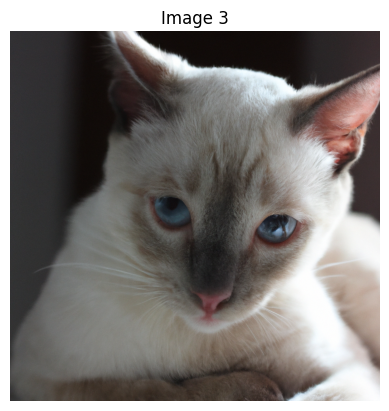

In [2]:
from openai import OpenAI
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

client = OpenAI()

# Generate 3 images
response = client.images.generate(
    model="dall-e-2",
    prompt="a white siamese cat",
    size="1024x1024",
    quality="standard",
    n=3,  # Generate 3 images
)

# Loop through the generated images, display them with matplotlib, and save as JPG
for i, data in enumerate(response.data):
    # Get the image URL
    image_url = data.url

    # Fetch the image
    img_response = requests.get(image_url)
    img = Image.open(BytesIO(img_response.content))

    # Save the image as JPG to disk
    img.save(f"cat_image_{i+1}.jpg", "JPEG")

    # Display the image using matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide the axes for a cleaner view
    plt.title(f"Image {i+1}")  # Add a title to differentiate the images
    plt.show()


## DALI 3

With the release of DALL·E 3, the model now takes in the default prompt provided and automatically re-write it for safety reasons, and to add more detail (more detailed prompts generally result in higher quality images).

While it is not currently possible to disable this feature, you can use prompting to get outputs closer to your requested image by adding the following to your prompt:

```
I NEED to test how the tool works with extremely simple prompts. DO NOT add any detail, just use it AS-IS:.
```

The updated prompt is visible in the revised_prompt field of the data response object.

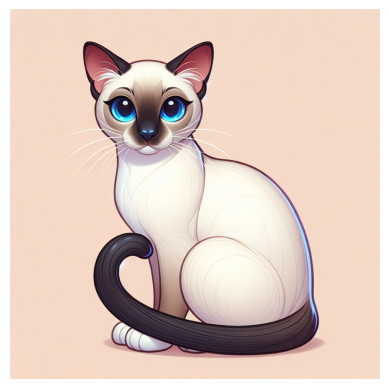

In [3]:
from openai import OpenAI
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

client = OpenAI()

# Generate the image
response = client.images.generate(
  model="dall-e-3",
  prompt="a white siamese cat",
  size="1024x1024",
  quality="standard",
  n=1,
)

# Get the image URL
image_url = response.data[0].url

# Fetch the image from the URL
response2 = requests.get(image_url)
img = Image.open(BytesIO(response2.content))

# Save the image as a JPG to disk
img.save("cat_image.jpg", "JPEG")

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axes for a cleaner view
plt.show()


DALLE will refuse to generate inappropriate images. If you request such an image, you will get the following error.
```
BadRequestError: Error code: 400 - {'error': {'code': 'content_policy_violation', 'message': 'Your request was rejected as a result of our safety system. Your prompt may contain text that is not allowed by our safety system.', 'param': None, 'type': 'invalid_request_error'}}
```

You can download any of the images you generated in Google CoLab with the following command.


In [6]:
from google.colab import files

# Download the image saved as variation_image_1.png
files.download('cat_image.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>